In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Ship:
    def __init__(self, length, symbol, name):
        self.length = length
        self.symbol = symbol
        self.name = name

In [4]:
class GoodPlayer:
    def __init__(self, game, ship_types):
        self.game = game
        self.ship_types = ship_types
        self.ROWS, self.COLS = game.shape
        self.missed = []
        self.destroyed = []
        self.spot_prob = np.zeros((self.ROWS, self.COLS))
        self.state = 0 # Hunting
        self.moves = 0
        
    def check_destroyed(self):
        for ship in self.ship_types:
            if not np.isin(ship.symbol, self.game):
                print(f'{ship.name} destroyed!')
                self.ship_types.remove(ship)
                return True
        return False
        
    def valid_position(self, row, col):
        if row < 0 or row >= self.ROWS or col < 0 or col >= self.COLS:
            return False
        if (row, col) in self.missed:
            return False
        return True
    
    def valid_place(self, row, col, length, direction):
        if not self.valid_position(row, col):
            return False
        if direction == 'v':
            for r in range(row, row + length):
                if not self.valid_position(r, col):
                    return False
            return True
        if direction == 'h':
            for c in range(col, col + length):
                if not self.valid_position(row, c):
                    return False
            return True
        
        return False
    
    def choose(self):
        if (self.state == 0):
            self.hunt_prob()
        if (self.state == 1):
            self.target_prob()
        max_ = 0
        point = (0, 0)
        points = []
        self.plot()
        for i, value in np.ndenumerate(self.spot_prob):
            if value == max_:
                if self.spot_prob[point] == max_:
                    points.append(point)
                points.append(i)
            if value > max_:
                points = []
                max_ = value
                point = i
        if len(points) > 0:
            return random.choice(points)
        return point
    
    def attack(self):
        if len(self.ship_types) == 0:
            self.hunt_prob()
            self.plot()
            print(f'Finished in {self.moves} moves!')
            return False
        self.moves += 1
        point = self.choose()
        print(point)
        if game[point] == '.':
            print('Missed!')
            self.missed.append(point)
            self.game[point] = 'o'
        else:
            print('Hit!')
            self.destroyed.append(point)
            self.game[point] = 'X'
            self.state = 1
        
        if self.check_destroyed():
            self.state = 0
            for point in self.destroyed:
                self.missed.append(point)
            self.destroyed = []
        return True
    
    def hunt_prob(self):
        self.spot_prob = np.zeros((self.ROWS, self.COLS))
        for ship in self.ship_types:
            for row in range(self.ROWS):
                for col in range(self.COLS):
                    # check cross hair
                    for i in range(row - ship.length + 1, row + 1):
                        if self.valid_place(i, col, ship.length, 'v'):
                            self.spot_prob[row, col] += 1
                    for i in range(col - ship.length + 1, col + 1):
                        if self.valid_place(row, i, ship.length, 'h'):
                            self.spot_prob[row, col] += 1

    def target_prob(self):
        self.spot_prob = np.zeros((self.ROWS, self.COLS))
        for ship in self.ship_types:
            for row, col in self.destroyed:
                # For start position in crosshair
                for i in range(row - ship.length + 1, row + 1):
                    for j in range(i, i + ship.length):
                        if self.valid_position(j, col):
                            self.spot_prob[j, col] += 1
                for i in range(col - ship.length + 1, col + 1):
                    for j in range(i, i + ship.length):
                        if self.valid_position(row, j):
                            self.spot_prob[row, j] += 1
                        
        # Don't target destroyed spot
        for point in self.destroyed:
            self.spot_prob[point] = 0
            
    def plot(self):
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.xticks(ticks=np.arange(self.COLS), labels=np.arange(self.COLS))
        plt.yticks(ticks=np.arange(self.ROWS), labels=np.arange(self.ROWS))
        plt.title('Battleship Probability Density')
        im = plt.imshow(self.spot_prob, cmap='binary', interpolation='nearest')
        plt.colorbar(im)
        plt.show()

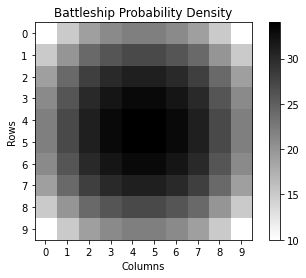

(4, 5)
Missed!



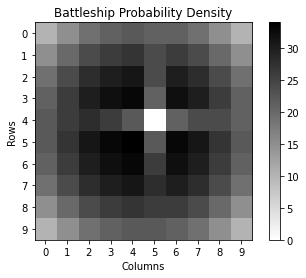

(5, 4)
Missed!



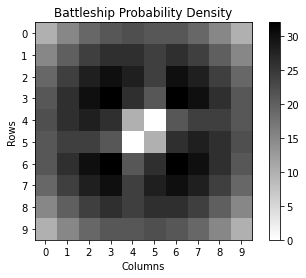

(3, 6)
Missed!



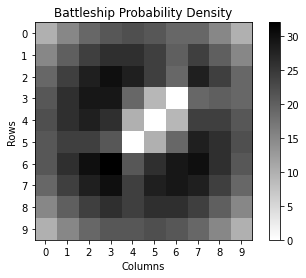

(6, 3)
Missed!



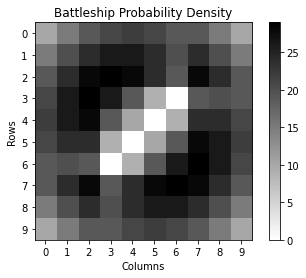

(2, 3)
Hit!



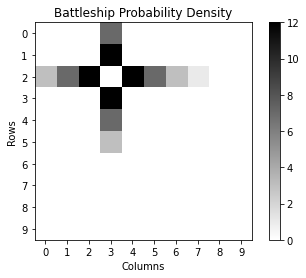

(1, 3)
Hit!



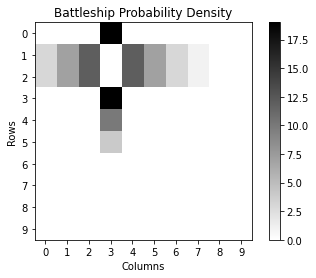

(3, 3)
Hit!



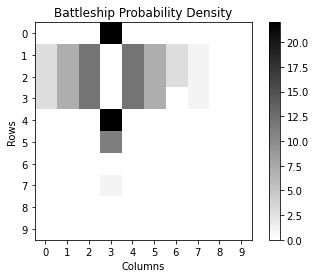

(0, 3)
Missed!



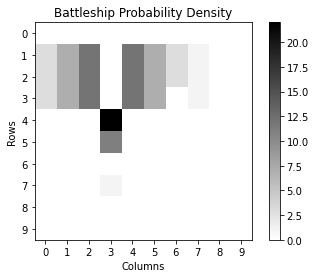

(4, 3)
Hit!



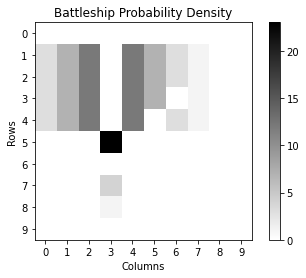

(5, 3)
Hit!
aircraft carrier destroyed!



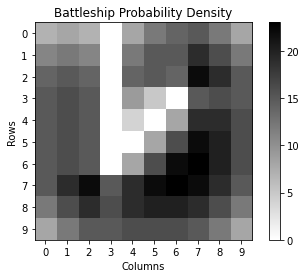

(6, 7)
Missed!



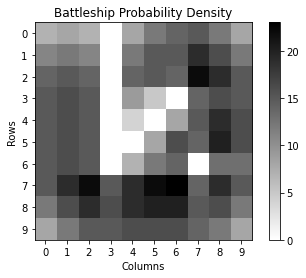

(7, 6)
Missed!



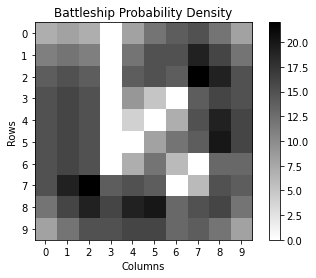

(7, 2)
Missed!



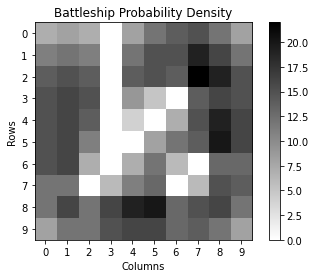

(2, 7)
Missed!



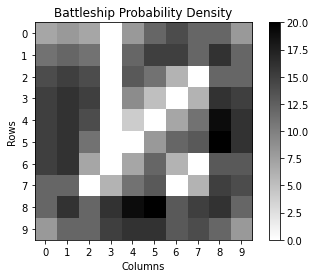

(8, 5)
Missed!



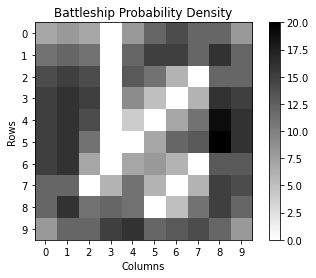

(5, 8)
Hit!



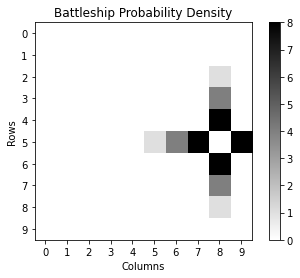

(4, 8)
Missed!



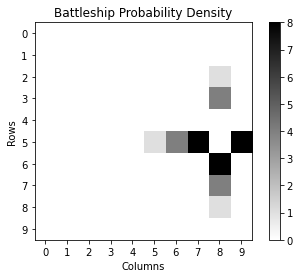

(5, 7)
Missed!



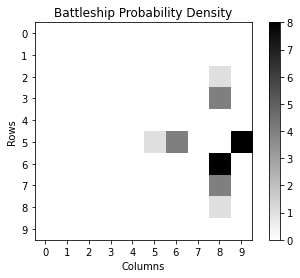

(6, 8)
Hit!



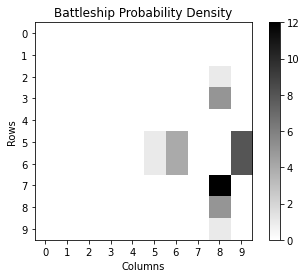

(7, 8)
Hit!
cruiser destroyed!



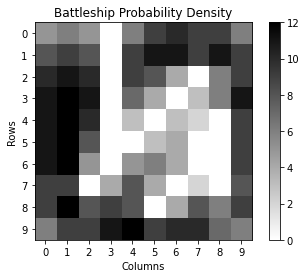

(8, 1)
Hit!



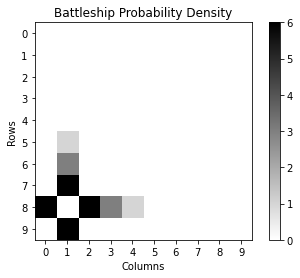

(7, 1)
Hit!



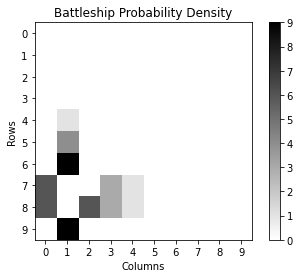

(9, 1)
Hit!
submarine destroyed!



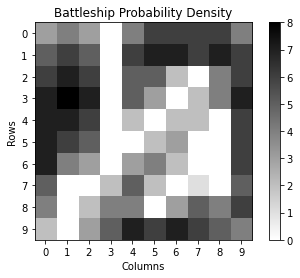

(3, 1)
Missed!



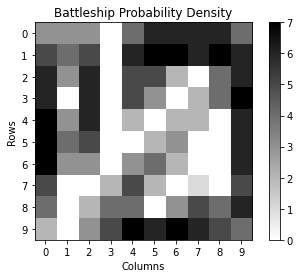

(1, 5)
Missed!



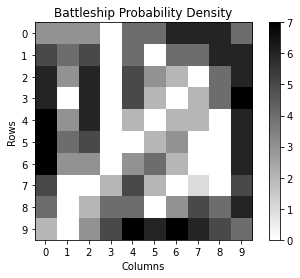

(6, 0)
Missed!



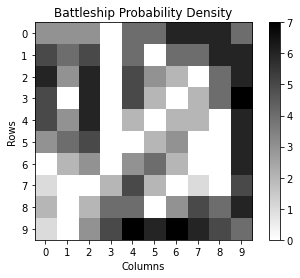

(9, 4)
Hit!



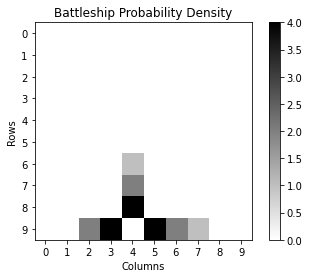

(8, 4)
Missed!



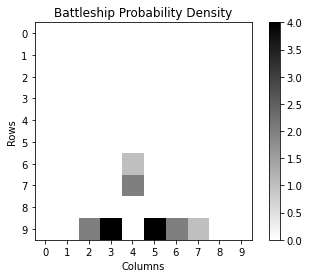

(9, 3)
Missed!



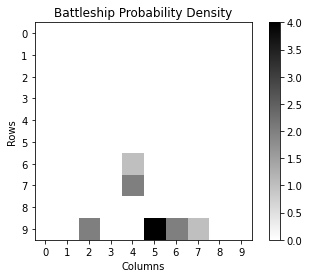

(9, 5)
Hit!



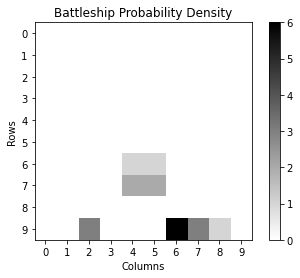

(9, 6)
Hit!



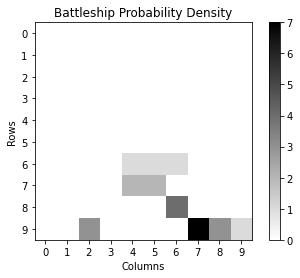

(9, 7)
Hit!
battleship destroyed!



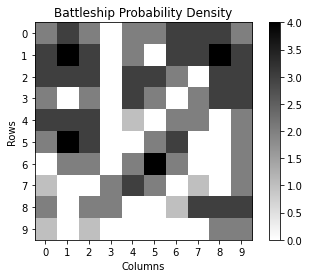

(1, 1)
Missed!



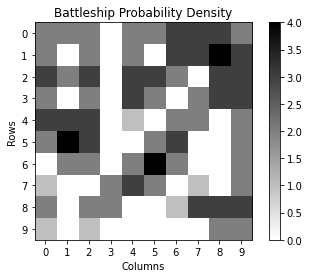

(1, 8)
Hit!



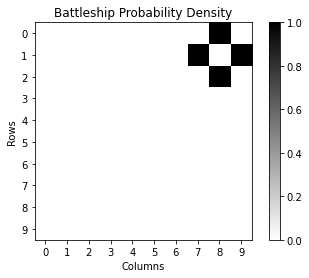

(0, 8)
Missed!



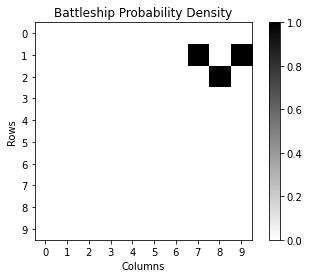

(1, 7)
Hit!
destroyer destroyed!



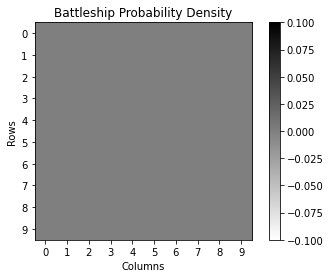

Finished in 36 moves!


In [6]:
%matplotlib inline
board = '''
..........
...A...DD.
...A......
...A......
...A......
...A....C.
........C.
.S......C.
.S........
.S..BBBB..
'''
ship_types = [Ship(2, 'D', 'destroyer'), Ship(3, 'C', 'cruiser'), Ship(3, 'S', 'submarine'), Ship(4, 'B', 'battleship'), Ship(5, 'A', 'aircraft carrier')]
game = np.array([[ch for ch in row] for row in board.lstrip('\n').rstrip('\n').split('\n')])
p = GoodPlayer(game, ship_types)

while (p.attack()):
    print()